In [42]:
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans, MeanShift
import matplotlib.pyplot as plt

def load_image(filename) :
    img = Image.open(filename)
    data = np.array( img, dtype='uint8' )
    return data

img = load_image('data/img2.jpg')

In [2]:
from matplotlib.pyplot import imshow
fig, ax = subplots(figsize=(15, 17))
ax.imshow(img, interpolation="nearest")  

In [3]:
pixel_array = img.reshape(img.shape[0]*img.shape[1],3)
pixel_array

array([[103, 109, 121],
       [162, 168, 180],
       [155, 161, 175],
       ...,
       [ 72,  70,  21],
       [ 69,  67,  16],
       [ 65,  63,  12]], dtype=uint8)

In [4]:
n=5

kmeans = KMeans(n_clusters=n).fit(pixel_array)

In [5]:
labels_img = kmeans.labels_.reshape(img.shape[0],img.shape[1])

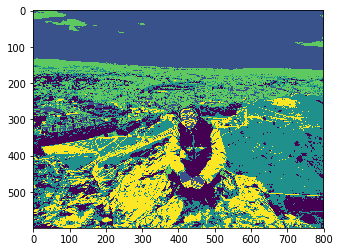

In [6]:
imshow(labels_img, interpolation="nearest")  

In [36]:
import statistics 

def get_avg_color(pixels, labels, label):
    r_sum = 0
    g_sum = 0
    b_sum = 0
    count = 0
    for ((r,g,b), l) in zip(pixels,labels):
        if l == label:
            r_sum += r
            g_sum += g
            b_sum += b
            count += 1

    return r_sum//count, g_sum//count, b_sum//count

def get_mean_color(pixels, labels, label):
    r_values = []
    g_values = []
    b_values = []
    count = 0
    for ((r,g,b), l) in zip(pixels,labels):
        if l == label:
            r_values.append(r)
            g_values.append(g)
            b_values.append(b)

    return int(statistics.median(r_values)), int(statistics.median(g_values)), int(statistics.median(b_values))

get_avg_color(pixel_array, kmeans.labels_, 0)
get_mean_color(pixel_array, kmeans.labels_,0)

(50, 42, 25)

In [8]:
def get_compressed(pixel_array, labels,n):
    avg_colors = []
    for i in range(0,n):
        avg_colors.append(get_avg_color(pixel_array, labels,i))
    return avg_colors

compressed_colors = get_compressed(pixel_array, kmeans.labels_, n)
print(compressed_colors)
print(kmeans.labels_)

[(48, 40, 30), (202, 204, 215), (107, 91, 51), (126, 128, 141), (173, 132, 94)]
[3 1 3 ... 0 0 0]


In [9]:
def compress_pixel_array(labels, compressed_colors):
    new_pixel_array = []
    for l in labels:
        new_pixel_array.append(compressed_colors[l])
    return new_pixel_array

compressed_array = np.array(compress_pixel_array(kmeans.labels_, compressed_colors))

In [47]:
compressed_img = compressed_array.reshape(img.shape[0],img.shape[1],3)
fig, ax = plt.subplots(1,2,1,figsize=(15, 17))
ax.imshow(compressed_img, interpolation="nearest") 
fig, ax = plt.subplots(1,2,2,figsize=(15, 17))
ax.imshow(compressed_img, interpolation="nearest")  
plt.show()

ValueError: sharex [1] must be one of ['all', 'row', 'col', 'none']

<Figure size 432x288 with 0 Axes>

In [11]:
def compress_image(color_count, img):
    pixel_array = img.reshape(img.shape[0]*img.shape[1],3)
    kmeans = KMeans(n_clusters=color_count).fit(pixel_array)
    labels_img = kmeans.labels_.reshape(img.shape[0],img.shape[1])
    print(kmeans.labels_)
    compressed_colors = get_compressed(pixel_array, kmeans.labels_, color_count)
    print(compressed_colors)
    compressed_array = np.array(compress_pixel_array(kmeans.labels_, compressed_colors))
    compressed_img = compressed_array.reshape(img.shape[0],img.shape[1],3)
    return compressed_img

[0 1 1 ... 0 0 0]
[(104, 88, 62), (194, 191, 197)]


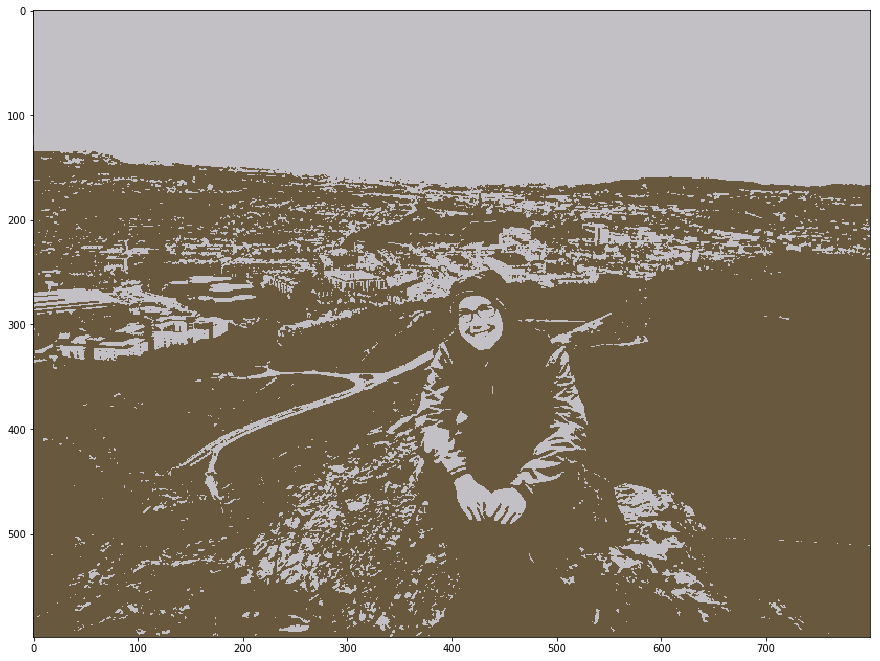

In [12]:
img2 = compress_image(2, img)
fig, ax = subplots(figsize=(15, 17))
ax.imshow(img2, interpolation="nearest")  

[3 2 3 ... 4 4 4]
[(173, 132, 94), (107, 91, 51), (201, 204, 215), (125, 128, 141), (48, 40, 30)]


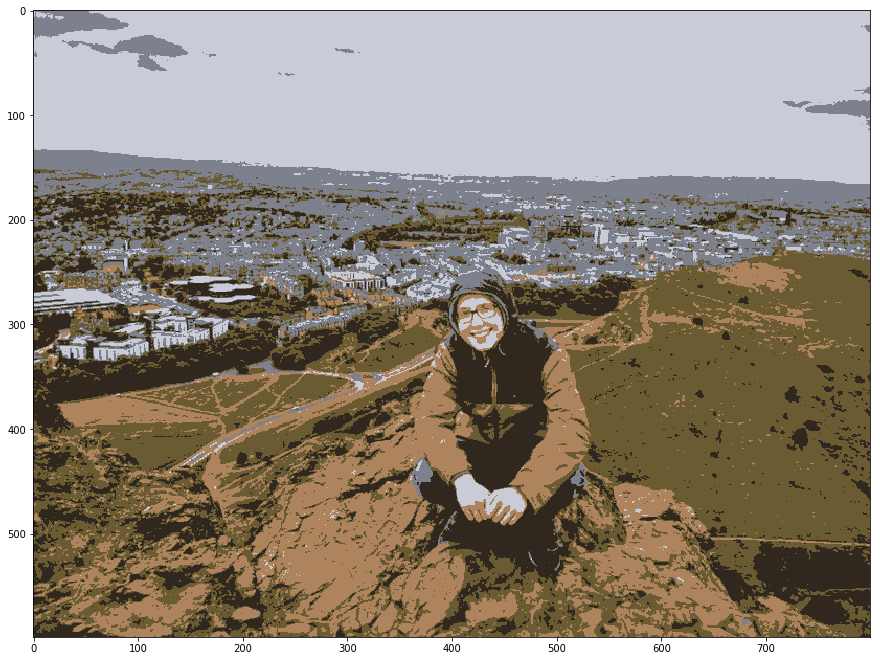

In [13]:
img5 = compress_image(5, img)
fig, ax = subplots(figsize=(15, 17))
ax.imshow(img5, interpolation="nearest")  

[18 14 14 ... 17 17 17]
[(185, 189, 203), (90, 93, 102), (98, 92, 34), (144, 140, 68), (40, 48, 51), (103, 116, 146), (224, 227, 234), (179, 130, 97), (118, 110, 47), (203, 206, 218), (145, 142, 148), (207, 160, 123), (15, 13, 17), (66, 73, 74), (162, 167, 181), (122, 78, 53), (54, 36, 14), (86, 59, 28), (124, 118, 117), (151, 104, 75)]


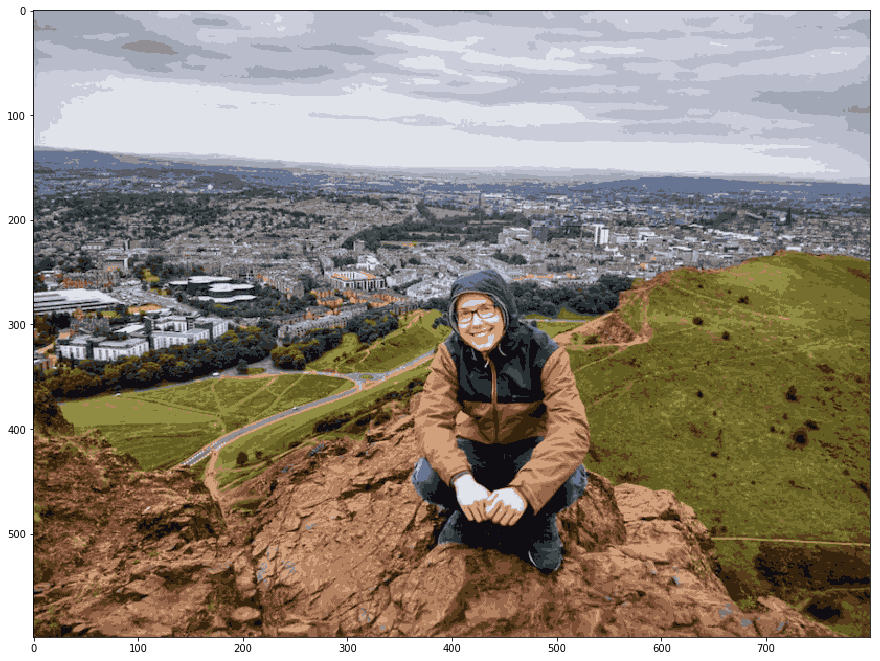

In [14]:
img20 = compress_image(20, img)
fig, ax = subplots(figsize=(15, 17))
ax.imshow(img20, interpolation="nearest")  

[11  8  8 ... 27 27 27]
[(105, 98, 38), (191, 195, 209), (35, 25, 9), (148, 141, 140), (188, 143, 117), (105, 64, 40), (81, 91, 115), (232, 234, 239), (154, 164, 185), (206, 164, 138), (148, 109, 86), (109, 105, 105), (124, 136, 163), (64, 72, 88), (119, 111, 47), (92, 86, 30), (178, 183, 197), (123, 79, 53), (153, 149, 76), (204, 208, 220), (169, 161, 159), (134, 128, 59), (236, 195, 180), (33, 41, 75), (127, 122, 125), (41, 49, 33), (86, 47, 26), (72, 68, 23), (11, 7, 9), (140, 94, 66), (99, 112, 142), (229, 169, 104), (218, 222, 230), (88, 89, 79), (170, 110, 71), (197, 135, 86), (170, 125, 99), (62, 34, 13), (10, 15, 43), (60, 67, 57)]


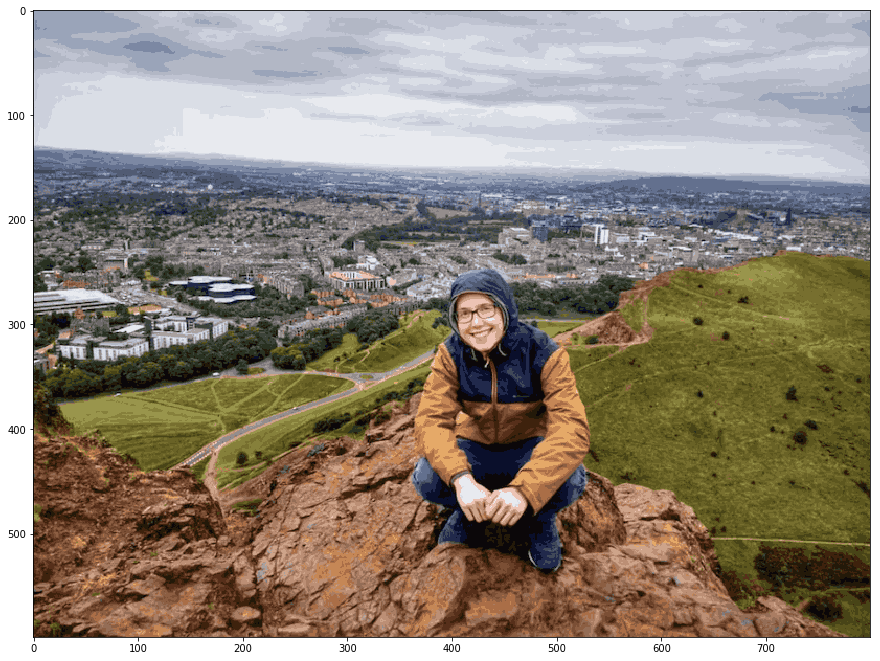

In [15]:
img40 = compress_image(40, img)
fig, ax = subplots(figsize=(15, 17))
ax.imshow(img40, interpolation="nearest")  

In [28]:
def compress_image_mean_shift(img):
    pixel_array = img.reshape(img.shape[0]*img.shape[1],3)
    meanshift = MeanShift(bandwidth=20).fit(pixel_array)
    color_count = max(meanshift.labels_)+1
    print(color_count)
    compressed_colors = get_compressed(pixel_array, meanshift.labels_, color_count)
    compressed_array = np.array(compress_pixel_array(meanshift.labels_, compressed_colors))
    compressed_img = compressed_array.reshape(img.shape[0],img.shape[1],3)
    return compressed_img

8


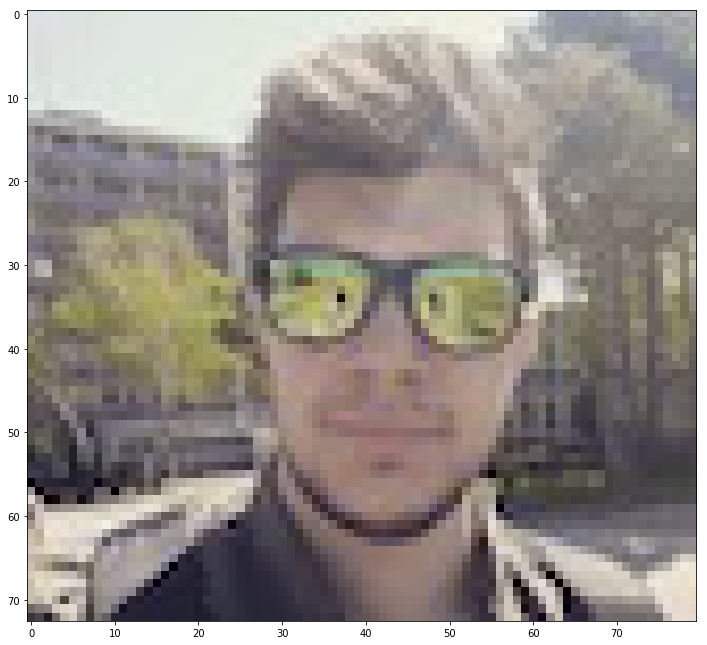

In [32]:
edvin = load_image('data/edvin.jpg')
fig, ax = subplots(figsize=(12, 12))
ax.imshow(edvin, interpolation="nearest")  
compressed_edvin =  compress_image_mean_shift(edvin)

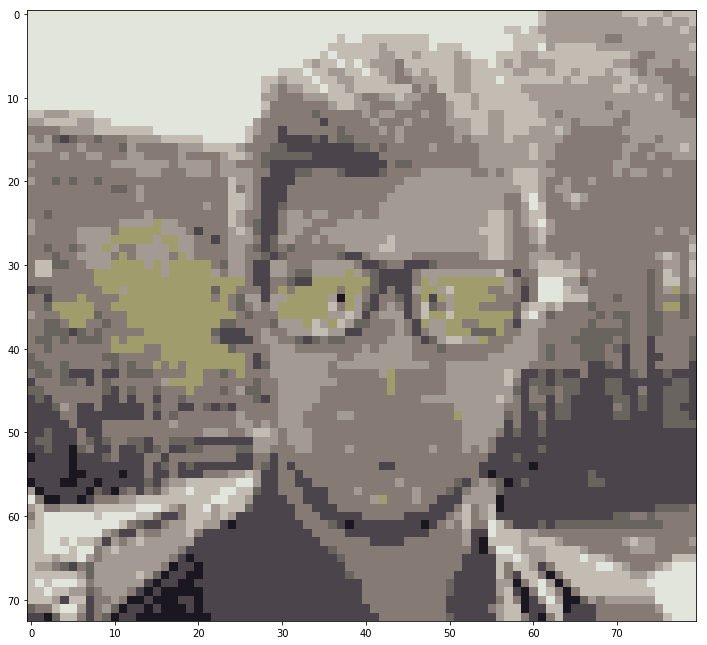

In [33]:
fig, ax = subplots(figsize=(12, 12))
imshow(compressed_edvin, interpolation="nearest")  